<a href="https://colab.research.google.com/github/NuttakitDW/DeepWork_216/blob/master/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
#these file already preprocessing
data = pd.read_csv('https://raw.githubusercontent.com/NuttakitDW/DeepWork_216/master/train_data.csv')
test_X = pd.read_csv('https://raw.githubusercontent.com/NuttakitDW/DeepWork_216/master/test_data.csv')

In [124]:
data.head()

,id,gender,ocp_cd,age,cc_sum,cc_mean,cc_cnt_sum,cc_cnt_mean,kp_mean,kp_sum,kp_cnt_mean,kp_cnt_sum,overall,income
0,1,2,9.0,5,44700.0,7450.000000,5.0,0.833333,291.666667,1.750000e+03,0.166667,1.000000,4.645000e+04,20000
1,2,2,3.0,4,65200.0,10866.666667,42.0,7.000000,8221.666667,4.933000e+04,4.108333,24.650000,1.145300e+05,106000
2,3,2,1.0,3,0.0,0.000000,0.0,0.000000,6713.888889,4.028333e+04,3.388889,20.333333,4.028333e+04,29000
3,4,2,3.0,5,770000.0,128333.333333,36.0,6.000000,242291.666667,1.453750e+06,12.675000,76.050000,2.223750e+06,61000
4,5,2,9.0,4,12000.0,2000.000000,3.0,0.500000,0.000000,0.000000e+00,0.000000,0.000000,1.200000e+04,18000


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00402091 0.03379948 0.03019009 0.11150197 0.11150819 0.07491736
 0.07404863 0.10573554 0.10604192 0.10383589 0.1044569  0.13994311]


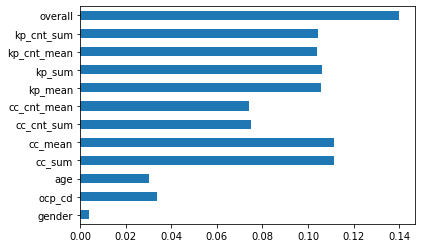

In [141]:
data_fea = data.copy()
data_fea = data_fea.fillna(0)
feature_fea = X.columns
X = data_fea[feature_fea] 
y = data_fea.income    
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

In [0]:
#find the best feature set
y = data.income
X = data.drop(['income', 'id'], axis=1)
feature = ['ocp_cd', 'age', 'cc_mean',
           'cc_cnt_mean', 'kp_sum', 'kp_cnt_mean', 'overall']
X = X[feature]

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

categorical_cols = [cname for cname in ['ocp_cd', 'age']]
numerical_cols = [cname for cname in X_train_full.columns if cname not in categorical_cols]

X_train = X_train_full.copy()
X_valid = X_valid_full.copy()

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [0]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()

In [0]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', xgb_model)
                             ])

In [188]:
# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:15:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [189]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')
print("Average MAE score (across experiments):")
print(scores.mean())

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:15:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:15:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:15:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:15:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:15:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Average MAE score (across experiments):
24962.756819985378


try to cut off cc_cnt feature
1. MAE: 24838.076957988767 (have both)
2. MAE: 24838.076957988767 (cut sum)
3. MAE: 24838.076957988767 (cut mean)
4. MAE: 24891.393045261557 (cut both)

try to cut off kp_cnt
1. MAE: 25474.578256067794 (cut both)
2. MAE: 24838.292218186663 (cut mean)
3. MAE: 24838.292218186663 (cut sum)


cut kplus_sum and cc_sum
1. MAE: 24838.076957988767  still same

cut overall

MAE: 24901.093227389145 (shouldn't do this)

conclusion

feature = ['ocp_cd', 'age', 'cc_mean',
           'cc_cnt_mean', 'kp_sum', 'kp_cnt_mean', 'overall']
MAE: 24939.594074739503
it have more MAE when we remove gender feature but it can help with
overfit problem.

In [178]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Create XGB Classifier object
xgb_reg = xgb.XGBRegressor(tree_method = "exact", predictor = "cpu_predictor", verbosity = 1,
                           eval_metric = ["mae"], objective = "reg:squarederror")
# Create parameter grid
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}

# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_reg, param_distributions = parameters, scoring = "neg_mean_absolute_error",
                             cv = 7, verbose = 3, random_state = 40)
#pipeline
rscv_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', xgb_rscv)
                             ])
# Fit the model
model_xgboost = rscv_pipeline.fit(X_train, y_train)

# Model best estimators
print("Learning Rate: ", model_xgboost.named_steps['model'].best_estimator_.get_params()["learning_rate"])
print("Gamma: ", model_xgboost.named_steps['model'].best_estimator_.get_params()["gamma"])
print("Max Depth: ", model_xgboost.named_steps['model'].best_estimator_.get_params()["max_depth"])
print("Subsample: ", model_xgboost.named_steps['model'].best_estimator_.get_params()["subsample"])
print("Max Features at Split: ", model_xgboost.named_steps['model'].best_estimator_.get_params()["colsample_bytree"])
print("Alpha: ", model_xgboost.named_steps['model'].best_estimator_.get_params()["reg_alpha"])
print("Lamda: ", model_xgboost.named_steps['model'].best_estimator_.get_params()["reg_lambda"])
print("Minimum Sum of the Instance Weight Hessian to Make a Child: ",
      model_xgboost.named_steps['model'].best_estimator_.get_params()["min_child_weight"])
print("Number of Trees: ", model_xgboost.named_steps['model'].best_estimator_.get_params()["n_estimators"])


Fitting 7 folds for each of 10 candidates, totalling 70 fits
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=-25725.579, total=   2.3s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=-25307.792, total=   2.3s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=-25129.869, total=   2.3s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=-25027.666, total=   2.3s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=-24439.228, total=   2.3s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=-26319.520, total=   2.3s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=-24143.769, total=   2.3s
[CV] subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8, score=-25201.123, total=   1.9s
[CV] subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8, score=-24769.050, total=   2.0s
[CV] subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8, score=-24296.621, total=   1.9s
[CV] subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8, score=-24864.574, total=   1.9s
[CV] subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8, score=-24085.415, total=   1.9s
[CV] subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8, score=-25821.737, total=   1.9s
[CV] subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8, score=-24157.996, total=   2.0s
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=-37904.563, total=   4.3s
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=-37578.403, total=   4.3s
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=-36481.341, total=   4.2s
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=-37705.102, total=   4.2s
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=-36799.184, total=   4.3s
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=-37963.483, total=   4.2s
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=-37066.335, total=   4.2s
[CV] subsample=0.7, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=1.0, score=-25477.889, total=   3.7s
[CV] subsample=0.7, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=1.0, score=-25111.302, total=   3.7s
[CV] subsample=0.7, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=1.0, score=-24889.022, total=   3.7s
[CV] subsample=0.7, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=1.0, score=-24748.346, total=   3.7s
[CV] subsample=0.7, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=1.0, score=-24306.402, total=   3.7s
[CV] subsample=0.7, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=1.0, score=-25922.565, total=   3.7s
[CV] subsample=0.7, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=1.0, score=-23816.028, total=   3.7s
[CV] subsample=0.5, reg_lambda=4.5, reg_alpha=1, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, reg_lambda=4.5, reg_alpha=1, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=1.0, score=-31183.439, total=  51.3s
[CV] subsample=0.5, reg_lambda=4.5, reg_alpha=1, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, reg_lambda=4.5, reg_alpha=1, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=1.0, score=-30807.279, total=  51.5s
[CV] subsample=0.5, reg_lambda=4.5, reg_alpha=1, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, reg_lambda=4.5, reg_alpha=1, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=1.0, score=-29811.853, total=  51.9s
[CV] subsample=0.5, reg_lambda=4.5, reg_alpha=1, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, reg_lambda=4.5, reg_alpha=1, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=1.0, score=-30920.579, total=  51.8s
[CV] subsample=0.5, reg_lambda=4.5, reg_alpha=1, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, reg_lambda=4.5, reg_alpha=1, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=1.0, score=-30168.666, total=  51.7s
[CV] subsample=0.5, reg_lambda=4.5, reg_alpha=1, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, reg_lambda=4.5, reg_alpha=1, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=1.0, score=-31420.242, total=  51.9s
[CV] subsample=0.5, reg_lambda=4.5, reg_alpha=1, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, reg_lambda=4.5, reg_alpha=1, n_estimators=500, min_child_weight=7, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=1.0, score=-30245.896, total=  51.8s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6, score=-43963.356, total=   7.2s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6, score=-43627.156, total=   7.2s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6, score=-42559.394, total=   7.1s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6, score=-43698.166, total=   7.1s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6, score=-42846.549, total=   7.1s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6, score=-43968.322, total=   7.1s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=3, reg_alpha=1, n_estimators=100, min_child_weight=3, max_depth=10, learning_rate=0.001, gamma=0.01, colsample_bytree=0.6, score=-43109.191, total=   7.1s
[CV] subsample=0.7, reg_lambda=1, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=0.3, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=1, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=0.3, colsample_bytree=0.6, score=-37900.763, total=  12.0s
[CV] subsample=0.7, reg_lambda=1, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=0.3, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=1, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=0.3, colsample_bytree=0.6, score=-37609.019, total=  12.0s
[CV] subsample=0.7, reg_lambda=1, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=0.3, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=1, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=0.3, colsample_bytree=0.6, score=-36530.862, total=  12.0s
[CV] subsample=0.7, reg_lambda=1, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=0.3, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=1, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=0.3, colsample_bytree=0.6, score=-37700.101, total=  11.9s
[CV] subsample=0.7, reg_lambda=1, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=0.3, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=1, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=0.3, colsample_bytree=0.6, score=-36875.736, total=  12.0s
[CV] subsample=0.7, reg_lambda=1, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=0.3, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=1, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=0.3, colsample_bytree=0.6, score=-38016.246, total=  12.0s
[CV] subsample=0.7, reg_lambda=1, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=0.3, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=1, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=0.3, colsample_bytree=0.6, score=-37100.960, total=  12.0s
[CV] subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, score=-25535.071, total=  44.9s
[CV] subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, score=-25013.966, total=  44.9s
[CV] subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, score=-24774.924, total=  44.7s
[CV] subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, score=-24773.571, total=  44.7s
[CV] subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, score=-24253.949, total=  44.8s
[CV] subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, score=-25933.697, total=  44.9s
[CV] subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=1.5, reg_alpha=0, n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.01, gamma=0.3, colsample_bytree=0.6, score=-23786.317, total=  45.1s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=0, n_estimators=250, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=3, reg_alpha=0, n_estimators=250, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=1.0, score=-24290.515, total=  25.5s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=0, n_estimators=250, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=3, reg_alpha=0, n_estimators=250, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=1.0, score=-23894.184, total=  25.5s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=0, n_estimators=250, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=3, reg_alpha=0, n_estimators=250, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=1.0, score=-23450.628, total=  25.5s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=0, n_estimators=250, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=3, reg_alpha=0, n_estimators=250, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=1.0, score=-23721.152, total=  25.3s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=0, n_estimators=250, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=3, reg_alpha=0, n_estimators=250, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=1.0, score=-23152.779, total=  25.3s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=0, n_estimators=250, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=3, reg_alpha=0, n_estimators=250, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=1.0, score=-24770.495, total=  25.4s
[CV] subsample=0.7, reg_lambda=3, reg_alpha=0, n_estimators=250, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=1.0 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, reg_lambda=3, reg_alpha=0, n_estimators=250, min_child_weight=7, max_depth=10, learning_rate=0.01, gamma=0.3, colsample_bytree=1.0, score=-22583.676, total=  25.4s
[CV] subsample=0.4, reg_lambda=2, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=2, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=2, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=2, colsample_bytree=0.6, score=-38009.576, total=  12.1s
[CV] subsample=0.4, reg_lambda=2, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=2, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=2, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=2, colsample_bytree=0.6, score=-37710.997, total=  12.0s
[CV] subsample=0.4, reg_lambda=2, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=2, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=2, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=2, colsample_bytree=0.6, score=-36635.127, total=  12.0s
[CV] subsample=0.4, reg_lambda=2, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=2, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=2, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=2, colsample_bytree=0.6, score=-37793.931, total=  12.0s
[CV] subsample=0.4, reg_lambda=2, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=2, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=2, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=2, colsample_bytree=0.6, score=-36962.990, total=  12.0s
[CV] subsample=0.4, reg_lambda=2, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=2, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=2, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=2, colsample_bytree=0.6, score=-38105.850, total=  12.0s
[CV] subsample=0.4, reg_lambda=2, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=2, colsample_bytree=0.6 


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.4, reg_lambda=2, reg_alpha=0.5, n_estimators=250, min_child_weight=7, max_depth=7, learning_rate=0.001, gamma=2, colsample_bytree=0.6, score=-37190.775, total=  11.9s


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed: 19.3min finished
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Learning Rate:  0.01
Gamma:  0.3
Max Depth:  10
Subsample:  0.7
Max Features at Split:  1.0
Alpha:  0
Lamda:  3
Minimum Sum of the Instance Weight Hessian to Make a Child:  7
Number of Trees:  250


Best parameter
Learning Rate:  0.01
Gamma:  0.3
Max Depth:  10
Subsample:  0.7
Max Features at Split:  1.0
Alpha:  0
Lamda:  3
Minimum Sum of the Instance Weight Hessian to Make a Child:  7
Number of Trees:  250

In [0]:
final_model = xgb.XGBRegressor(objective="reg:linear", random_state=42, 
                             learning_rate=0.01, gamma=0.3, max_depth=10, 
                             colsample_bytree=1, subsample=0.7, reg_alpha=0, reg_lambda=3,
                             min_child_weight=7, n_estimators=250
                             )

In [0]:
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', final_model)
                             ])

In [183]:
final_pipeline.fit(X_train, y_train)
preds = my_pipeline.predict(X_valid)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[08:47:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [185]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(final_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')
print("Average MAE score (across experiments):")
print(scores.mean())

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:12:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:13:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:13:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:14:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Average MAE score (across experiments):
23714.23659207275


In [0]:
'''
Model conclusion
feature = ['ocp_cd', 'age', 'cc_mean', 'cc_cnt_mean', 'kp_sum', 'kp_cnt_mean', 'overall'] 

Best parameter
Learning Rate:  0.01
Gamma:  0.3
Max Depth:  10
Subsample:  0.7
Max Features at Split:  1.0
Alpha:  0
Lamda:  3
Minimum Sum of the Instance Weight Hessian to Make a Child:  7
Number of Trees:  250
'''